In [22]:
import numpy as np # linear algebra
import os
import matplotlib.pyplot as plot
from PIL import Image
import cv2
from sklearn.cluster import KMeans
import random
from skimage.io import imread, imshow
from skimage.color import rgb2gray, rgb2hsv
from skimage.morphology import area_opening
from skimage.exposure import histogram
from skimage.filters import threshold_otsu

In [23]:
# loading images from the training set of city scape data 
def LoadImage(name, path="cityscapes_data\\cityscapes_data\\train",
             rotation=0.0, flip=False, cut_bottom=58,
             size=(256, 200)):
    img = Image.open(path+"/"+name)
    img = np.array(img)
    # second part of the appended image is the already segmented image 
    seg = img[:-cut_bottom, 256:]
    # 1st part is the original image without segmentation
    img = img[:-cut_bottom, 0:256]
    
    #Brighter image will have all pixels confined to high values.
    #But a good image will have pixels from all regions of the image. 
    # So we need to stretch this histogram to either ends and that is what Histogram Equalization does (in simple words).
    # This normally improves the contrast of the image.
    #for that we will be using the cv2.equalizeHist for this  purpose
    for i in range(3):
        zimg = img[:,:,i]
        zimg = cv2.equalizeHist(zimg)
        img[:,:,i] = zimg
    
    #take the matrix as the input and returns the image object CASA format return
    img = Image.fromarray(img).resize(size)
    seg = Image.fromarray(seg).resize(size)
    
    
   #simpe data augmentation options such as flipping and rotating
    img = img.rotate(rotation)
    seg = seg.rotate(rotation)

    img = np.array(img)
    seg = np.array(seg)

    if flip:
        img = img[:,::-1,:]
        seg = seg[:,::-1,:]

    # Returning the image in normalized form 
    return img/255, seg/255

In [24]:
#loading image formm the training set by giving path 
mypath = "cityscapes_data\\cityscapes_data\\train"
files = os.listdir(mypath)[0:10]

In [25]:
def masked_image(image, mask):
    r = image[:,:,0] * mask
    g = image[:,:,1] * mask
    b = image[:,:,2] * mask
    return np.dstack([r,g,b])


segmented image shape 200
Original image shape 256


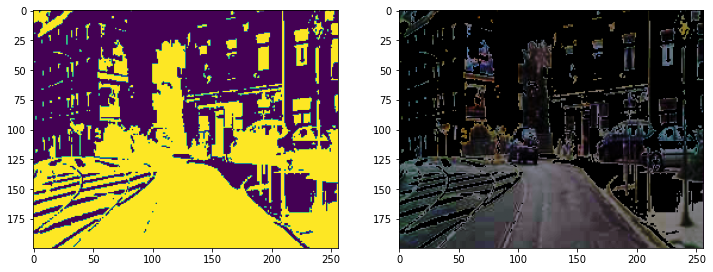

In [26]:
colors = []
for file in files:
    img, seg = LoadImage(file)
    colors.append(seg.reshape(seg.shape[0]*seg.shape[1], 3))
colors = np.array(colors)
colors = colors.reshape((colors.shape[0]*colors.shape[1],3))

print("segmented image shape", seg.shape[0])
print("Original image shape", seg.shape[1])



def otsu(img):
    img_gray = rgb2gray(img)
    thresh = threshold_otsu(img_gray)
    image_otsu  = img_gray < thresh
    filtered = masked_image(img, image_otsu)
    return filtered

img_gray = rgb2gray(img)
thresh = threshold_otsu(img_gray)
image_otsu  = img_gray < thresh
filtered = masked_image(img, image_otsu)
fig, ax = plot.subplots(1, 2, figsize=(12,6))

ax[0].imshow(image_otsu)
filtered = masked_image(img, image_otsu)
ax[1].imshow(filtered)

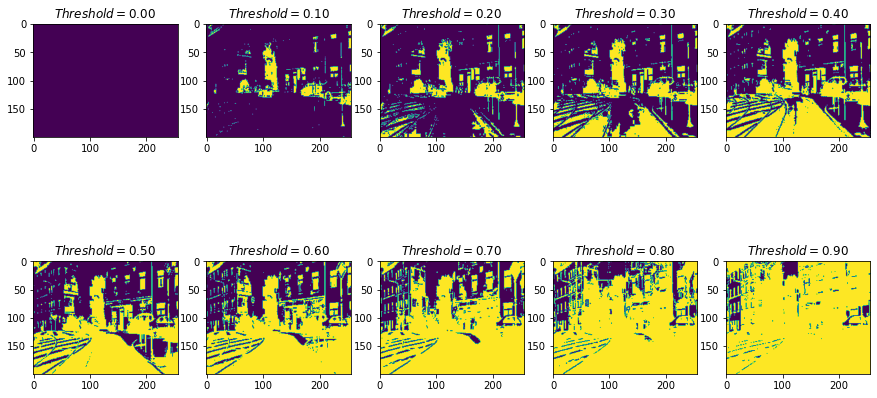

In [27]:
#the method is based on hit a trial method as it shows that setting different threshold give different results and our result
#in mostly in between the 0.2 to 0.4 threshold
th_values = np.linspace(0, 1, 11)
fig, axis = plot.subplots(2, 5, figsize=(15,8))
img_gray = rgb2gray(img)
for th, ax in zip(th_values, axis.flatten()):
    
    image_binarized = img_gray < th
    ax.imshow(image_binarized)
    ax.set_title('$Threshold = %.2f$' % th)

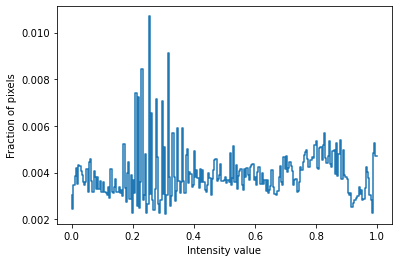

In [28]:
freq, bins = histogram(img_gray)
plot.step(bins, freq*1.0/freq.sum())
plot.xlabel('Intensity value')
plot.ylabel('Fraction of pixels');

HSV color space

Text(0.5, 1.0, 'semantic segmented image using otsu method ')

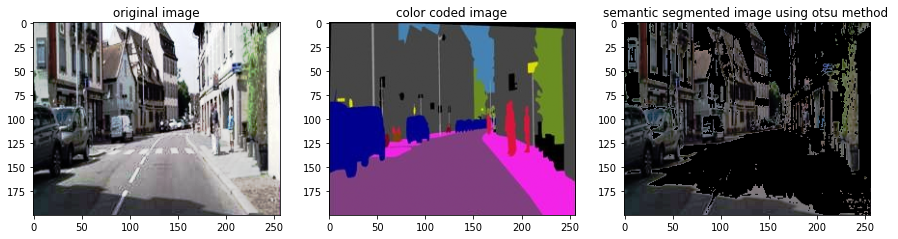

In [29]:
img, seg = LoadImage("2251.jpg")
total = otsu(img)

fig, axes = plot.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(img)
axes[0].set_title("original image")
axes[1].imshow(seg)
axes[1].set_title("color coded image")
axes[2].imshow(total)
axes[2].set_title("semantic segmented image using otsu method ")